In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
#from sklearn.preprocessing import LabelEncoder

In [245]:
data = pd.read_csv("acled_social_iso3_labeled.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8594 entries, 0 to 8593
Data columns (total 20 columns):
EVENT_DATE_MONTH                                     8594 non-null object
COUNTRY                                              8594 non-null object
Battles                                              8594 non-null float64
Explosions/Remote violence                           8594 non-null float64
Protests                                             8594 non-null float64
Riots                                                8594 non-null float64
Strategic developments                               8594 non-null float64
Violence against civilians                           8594 non-null float64
FATALITIES                                           8594 non-null int64
YEAR                                                 8594 non-null int64
Life expectancy at birth, total (years)              8594 non-null float64
GDP (current US$)                                    8594 non-null float64

In [246]:
def plot_correlation_matrix(corr_mat, labels=None):
    '''
    Function to plot a correlation matrix (nicely).

    Parameters
    ----------
    corr_mat : 2D array-like
               The correlation matrix to be plotted.
    labels :


    Returns
    -------
    fig : matplotlib.figure
          A figure containing the correlation matrix plot
    '''
    
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    if labels is not None:
        locs = np.arange(0., len(labels))
        labs = labels #[lab for lab in labels]

    # default: seismic
    img = ax.matshow(corr_mat, cmap='seismic', vmin=-1., vmax=1.)
    ax.tick_params(axis='both', labelsize=7)
    #ax.set_title(para.patches[i], fontsize=12)

    # magic numbers for correct scaling of colorbar
    c = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04, label='$\mathcal{C}_{ij} / \sqrt{\mathcal{C}_{ii} \mathcal{C}_{jj}}$')
    cbytick_obj = plt.getp(c.ax.axes, 'yticklabels')
    plt.setp(cbytick_obj, fontsize=5)

    if labels is not None:
        ax.xaxis.set_major_locator(ticker.FixedLocator((locs)))

        ax.set_xticklabels(labs, rotation=90)

        ax.yaxis.set_major_locator(ticker.FixedLocator((locs)))
        ax.yaxis.set_major_formatter(ticker.FixedFormatter((labs)))

    return fig

In [247]:
df_norm = data.copy()

In [248]:
df_norm = df_norm.fillna(value=0)
for col in df_norm.keys():
    if col in ['YEAR', 'EVENT_DATE_MONTH', 'COUNTRY', 'iso3', 'battle_case', 'protest_riots_case']:
        pass
    else:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std() 
#cols_to_norm = ['Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians', 'FATALITIES', 'GDP (current US$)', 'Population, Total']
df_norm.head()

,EVENT_DATE_MONTH,COUNTRY,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,FATALITIES,YEAR,"Life expectancy at birth, total (years)",GDP (current US$),"Death rate, crude (per 1,000 people)",Population growth (annual %),Urban population (% of total),"Central government, Fiscal Balance (Current US $)","Population, Total",iso3,battle_case,protest_riots_case
0,1997-07,Algeria,-0.413592,-0.126304,-0.328626,-0.330668,-0.294193,0.811788,0.402435,1997,0.885337,0.084393,-0.971374,-0.645914,1.207282,0.574686,0.171441,DZA,0.0,0.0
1,1997-07,Angola,0.037091,-0.266671,-0.328626,-0.330668,-0.113871,0.331296,0.182054,1997,-0.585801,-0.410218,2.363786,0.449442,-0.362450,-0.006678,-0.335216,AGO,1.0,0.0
2,1997-07,Burundi,-0.091675,-0.126304,-0.328626,-0.198425,-0.113871,0.251214,1.199939,1997,-0.182325,-0.480975,1.125490,-0.870934,-1.421554,0.287199,-0.567710,BDI,1.0,0.0
3,1997-07,Cameroon,-0.349208,-0.266671,-0.328626,-0.330668,-0.294193,-0.469525,-0.112705,1997,-0.035633,-0.370885,0.773364,0.389371,0.449004,0.237824,-0.306613,CMR,0.0,0.0
4,1997-07,Central African Republic,-0.413592,-0.266671,-0.328626,-0.330668,-0.113871,-0.469525,-0.112705,1997,-0.427610,-0.483980,1.739411,0.039455,0.079921,0.302035,-0.659760,CAF,1.0,0.0


In [249]:
df_mat = df_norm.drop(['EVENT_DATE_MONTH', 'COUNTRY', 'YEAR', 'iso3'], axis=1)
corr_mat = df_mat.corr(method='pearson')

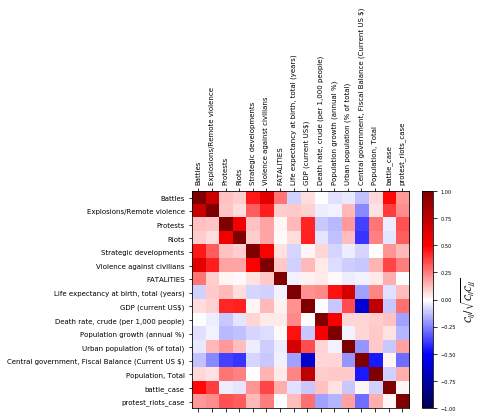

In [250]:
fig = plot_correlation_matrix(corr_mat, labels=df_mat.keys())

In [251]:
df_Ang = df_norm[df_norm["COUNTRY"] == 'Angola']

In [252]:
df_Ang.keys()

Index(['EVENT_DATE_MONTH', 'COUNTRY', 'Battles', 'Explosions/Remote violence',
       'Protests', 'Riots', 'Strategic developments',
       'Violence against civilians', 'FATALITIES', 'YEAR',
       'Life expectancy at birth, total (years)', 'GDP (current US$)',
       'Death rate, crude (per 1,000 people)', 'Population growth (annual %)',
       'Urban population (% of total)',
       'Central government, Fiscal Balance (Current US $)',
       'Population, Total', 'iso3', 'battle_case', 'protest_riots_case'],
      dtype='object')

In [253]:
df_Ang_mat = df_Ang.drop(['EVENT_DATE_MONTH', 'COUNTRY', 'YEAR', 'iso3'], axis=1)

In [254]:
corr_mat_Ang = df_Ang_mat.corr(method='pearson')

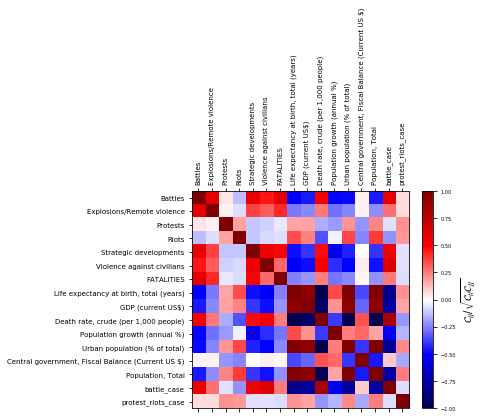

In [255]:
fig2 = plot_correlation_matrix(corr_mat_Ang, labels=df_Ang_mat.keys())

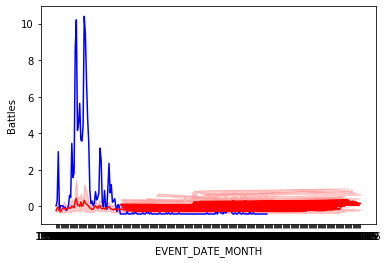

In [258]:
fig = sns.lineplot(x = 'EVENT_DATE_MONTH', y = 'Battles', data=df_Ang, color='blue')
fig = sns.lineplot(x = 'EVENT_DATE_MONTH', y = 'Battles', data=df_norm, color='red')

In [259]:
fname = "acled_social_iso3_labeled_normed.csv"
df_norm.to_csv(fname)

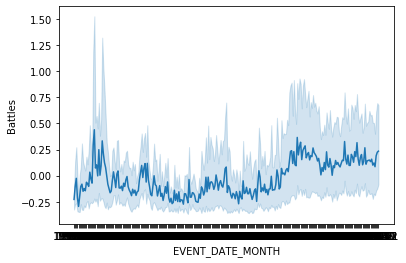

In [260]:
sns.lineplot(x='EVENT_DATE_MONTH', y='Battles', data=df_norm)

In [265]:
df9707 = df_norm[df_norm['EVENT_DATE_MONTH'] == '1997-07']

In [267]:
corr_mat9707 = df9707.corr(method='pearson')

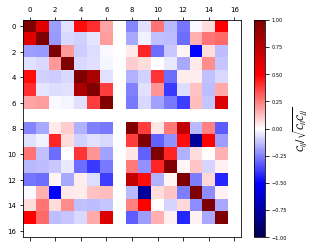

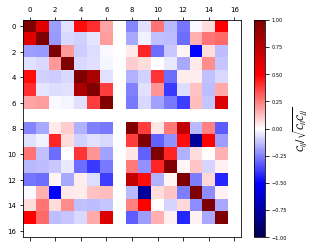

In [268]:
plot_correlation_matrix(corr_mat9707)

In [274]:
fname = 'acled_social_iso3_timelag_labeled.csv'
df_new = pd.read_csv(fname)
df_new.keys()

Index(['Unnamed: 0', 'EVENT_DATE_MONTH', 'COUNTRY', 'Battles',
       'Explosions/Remote violence', 'Protests', 'Riots',
       'Strategic developments', 'Violence against civilians', 'FATALITIES',
       'YEAR', 'Life expectancy at birth, total (years)', 'GDP (current US$)',
       'Death rate, crude (per 1,000 people)', 'Population growth (annual %)',
       'Urban population (% of total)',
       'Central government, Fiscal Balance (Current US $)',
       'Population, Total', 'iso3', 'Battles_1_month_ago',
       'Protests_1_month_ago', 'Explosions/Remote violence_1_month_ago',
       'Strategic developments_1_month_ago',
       'Violence against civilians_1_month_ago', 'FATALITIES_1_month_ago',
       'Battles_2_month_ago', 'Protests_2_month_ago',
       'Explosions/Remote violence_2_month_ago',
       'Strategic developments_2_month_ago',
       'Violence against civilians_2_month_ago', 'FATALITIES_2_month_ago',
       'Battles_3_month_ago', 'Protests_3_month_ago',
       'Explosi

In [275]:
df2_mat = df_new.drop(['EVENT_DATE_MONTH', 'COUNTRY', 'iso3'], axis=1)
corr2_mat = df2_mat.corr(method='pearson')

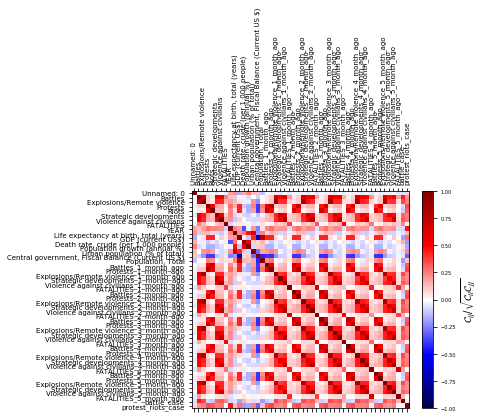

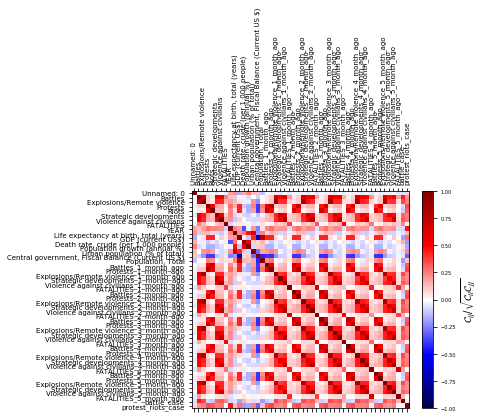

In [276]:
plot_correlation_matrix(corr2_mat, labels=corr2_mat.keys())